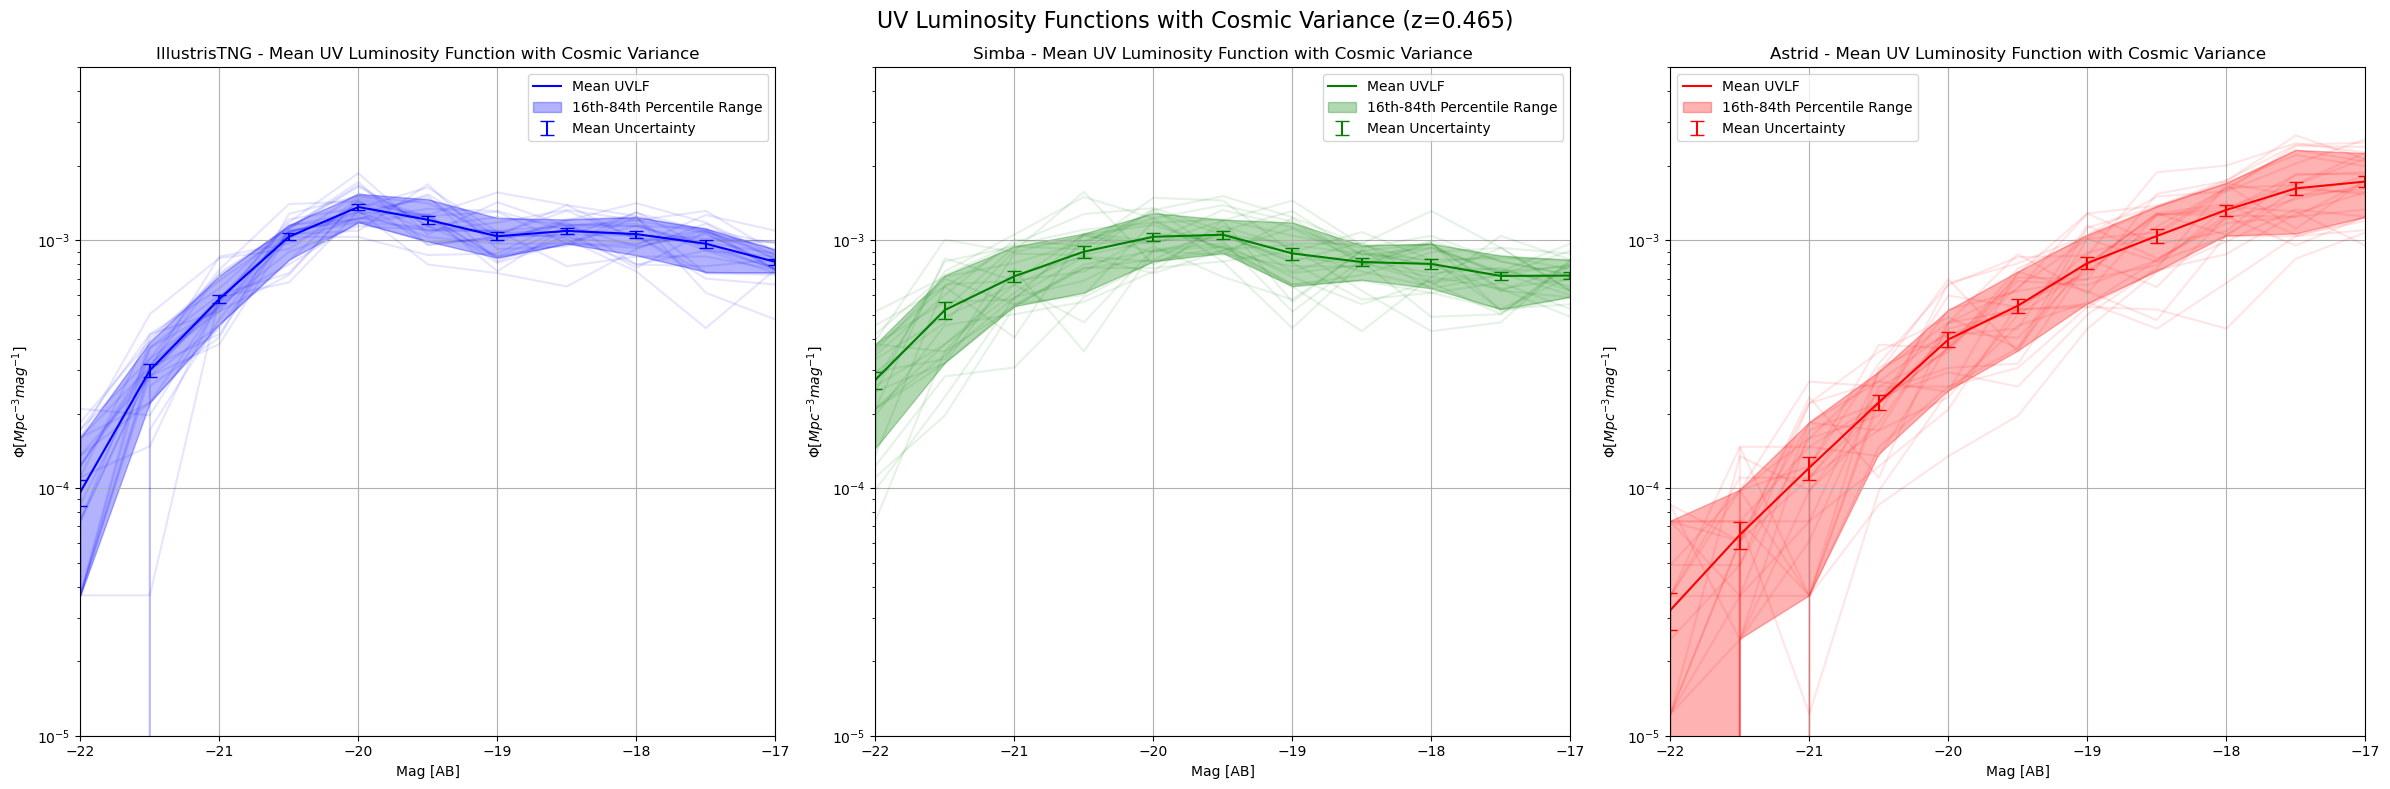

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_simulation(directory):
    files = os.listdir(directory)
    CV_X_files = [file for file in files if file.startswith("CV_") and file.endswith(".txt")]

    phia, phi_sigmaa, binsa, CV_X_values = [], [], [], []

    for CV_X_file in CV_X_files:
        file_path = os.path.join(directory, CV_X_file)
        CV_X = CV_X_file[:-4]
        variable_data = {}

        with open(file_path, 'r') as file:
            current_variable_name = None
            current_variable_values = []

            for line in file:
                line = line.strip()
                if not line:
                    continue
                if line in ['phi', 'phi_sigma', 'hist', 'massBinLimits']:
                    if current_variable_name is not None:
                        variable_data[current_variable_name] = current_variable_values
                        current_variable_values = []
                    current_variable_name = line
                else:
                    current_variable_values.append(float(line))

            if current_variable_name is not None:
                variable_data[current_variable_name] = current_variable_values

        phia.append(variable_data.get('phi'))
        phi_sigmaa.append(variable_data.get('phi_sigma'))
        binsa.append(variable_data.get('massBinLimits'))
        CV_X_values.append(CV_X)

    return pd.DataFrame({'CV_X': CV_X_values, 'phi': phia, 'phi_sigma': phi_sigmaa, 'bins': binsa})

def plot_simulation(ax, df, simulation_name, color):
    phi_arrays = np.array(df['phi'].tolist())
    phi_sigma_arrays = np.array(df['phi_sigma'].tolist())
    massBinLimits = df['bins'].iloc[0]

    mean_phi = np.mean(phi_arrays, axis=0)
    std_phi = np.std(phi_arrays, axis=0)
    lower_percentile = np.percentile(phi_arrays, 16, axis=0)
    upper_percentile = np.percentile(phi_arrays, 84, axis=0)

    ax.plot(massBinLimits[:-1], mean_phi, color=color, linestyle='-', label='Mean UVLF')
    ax.fill_between(massBinLimits[:-1], lower_percentile, upper_percentile, 
                    alpha=0.3, color=color, label='16th-84th Percentile Range')

    for phi in phi_arrays:
        ax.plot(massBinLimits[:-1], phi, color=color, alpha=0.1)

    ax.errorbar(massBinLimits[:-1], mean_phi, yerr=std_phi/np.sqrt(len(df)), 
                fmt='none', ecolor=color, capsize=5, label='Mean Uncertainty')

    ax.set_xlabel('Mag [AB]')
    ax.set_ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')
    ax.set_yscale('log')
    ax.set_title(f'{simulation_name} - Mean UV Luminosity Function with Cosmic Variance')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(-22, -17)
    ax.set_ylim(1e-5, 5e-3)

# Main script
base_directory = "/home/jovyan/camels/CV_set/CV_outputs/LFs"
simulations = ["IllustrisTNG", "Simba", "Astrid"]
colors = ["blue", "green", "red"]  # Colors for IllustrisTNG, Simba, and Astrid respectively

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('UV Luminosity Functions with Cosmic Variance (z=0.465)', fontsize=16)

for i, (simulation, color) in enumerate(zip(simulations, colors)):
    directory = os.path.join(base_directory, simulation)
    df = process_simulation(directory)
    plot_simulation(axes[i], df, simulation, color)

plt.tight_layout()
plt.savefig("/home/jovyan/camels/CV_set/CV_outputs/plots/UVLF_Mean_CV_Combined.png", dpi=300, bbox_inches='tight')
plt.show()

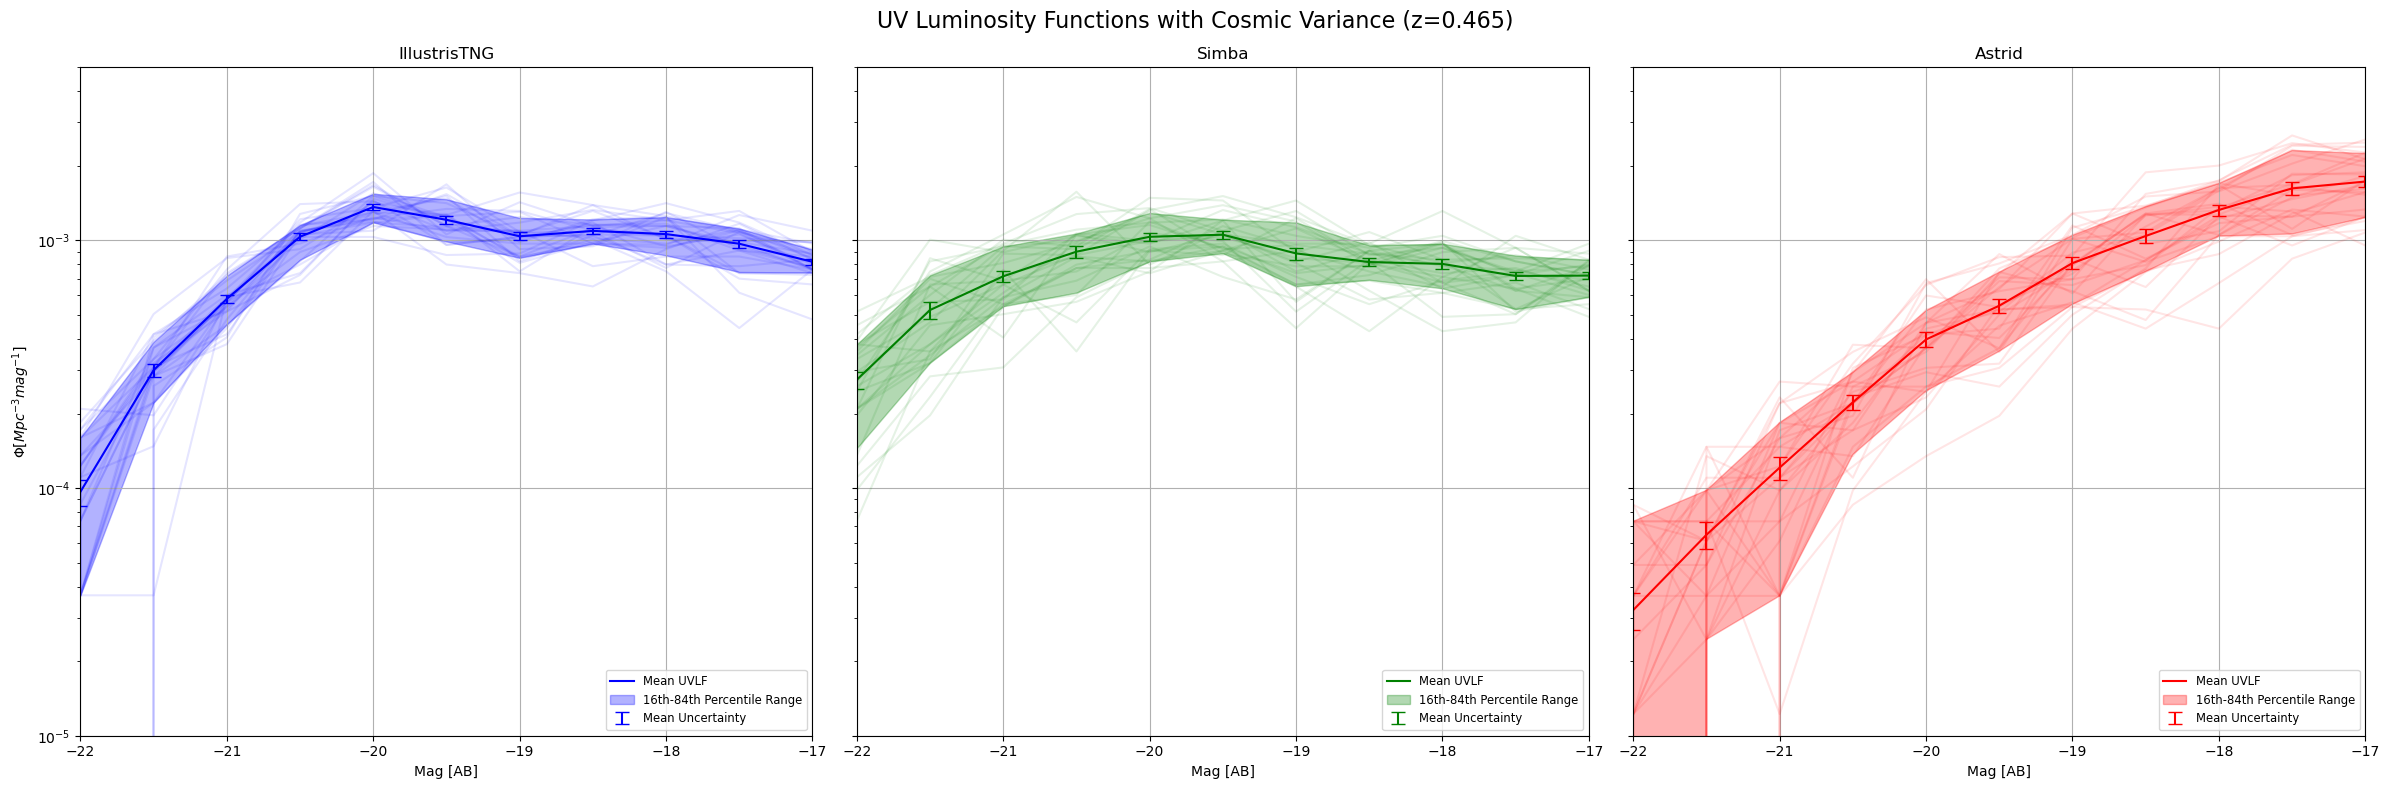

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_simulation(directory):
    files = os.listdir(directory)
    CV_X_files = [file for file in files if file.startswith("CV_") and file.endswith(".txt")]

    phia, phi_sigmaa, binsa, CV_X_values = [], [], [], []

    for CV_X_file in CV_X_files:
        file_path = os.path.join(directory, CV_X_file)
        CV_X = CV_X_file[:-4]
        variable_data = {}

        with open(file_path, 'r') as file:
            current_variable_name = None
            current_variable_values = []

            for line in file:
                line = line.strip()
                if not line:
                    continue
                if line in ['phi', 'phi_sigma', 'hist', 'massBinLimits']:
                    if current_variable_name is not None:
                        variable_data[current_variable_name] = current_variable_values
                        current_variable_values = []
                    current_variable_name = line
                else:
                    current_variable_values.append(float(line))

            if current_variable_name is not None:
                variable_data[current_variable_name] = current_variable_values

        phia.append(variable_data.get('phi'))
        phi_sigmaa.append(variable_data.get('phi_sigma'))
        binsa.append(variable_data.get('massBinLimits'))
        CV_X_values.append(CV_X)

    return pd.DataFrame({'CV_X': CV_X_values, 'phi': phia, 'phi_sigma': phi_sigmaa, 'bins': binsa})

def plot_simulation(ax, df, simulation_name, color):
    phi_arrays = np.array(df['phi'].tolist())
    phi_sigma_arrays = np.array(df['phi_sigma'].tolist())
    massBinLimits = df['bins'].iloc[0]

    mean_phi = np.mean(phi_arrays, axis=0)
    std_phi = np.std(phi_arrays, axis=0)
    lower_percentile = np.percentile(phi_arrays, 16, axis=0)
    upper_percentile = np.percentile(phi_arrays, 84, axis=0)

    ax.plot(massBinLimits[:-1], mean_phi, color=color, linestyle='-', label='Mean UVLF')
    ax.fill_between(massBinLimits[:-1], lower_percentile, upper_percentile, 
                    alpha=0.3, color=color, label='16th-84th Percentile Range')

    for phi in phi_arrays:
        ax.plot(massBinLimits[:-1], phi, color=color, alpha=0.1)

    ax.errorbar(massBinLimits[:-1], mean_phi, yerr=std_phi/np.sqrt(len(df)), 
                fmt='none', ecolor=color, capsize=5, label='Mean Uncertainty')

    ax.set_xlabel('Mag [AB]')
    ax.set_title(simulation_name)
    ax.legend(fontsize='small',loc='lower right')
    ax.grid(True)
    ax.set_xlim(-22, -17)
    ax.set_ylim(1e-5, 5e-3)

# Main script
base_directory = "/home/jovyan/camels/CV_set/CV_outputs/LFs"
simulations = ["IllustrisTNG", "Simba", "Astrid"]
colors = ["blue", "green", "red"]  # Colors for IllustrisTNG, Simba, and Astrid respectively

fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)
fig.suptitle('UV Luminosity Functions with Cosmic Variance (z=0.465)', fontsize=16)

for i, (simulation, color) in enumerate(zip(simulations, colors)):
    directory = os.path.join(base_directory, simulation)
    df = process_simulation(directory)
    plot_simulation(axes[i], df, simulation, color)
    
    # Only add y-label to the first subplot
    if i == 0:
        axes[i].set_ylabel('$\Phi [Mpc^{-3} mag^{-1}]$')

# Set y-scale for all subplots
for ax in axes:
    ax.set_yscale('log')

plt.tight_layout()
plt.savefig("/home/jovyan/camels/CV_set/CV_outputs/plots/UVLF_Mean_CV_Combined.png", dpi=300, bbox_inches='tight')
plt.show()